## Hypothesis 3 Testing
### Road accident frequency/severity increases with rainfall

In [70]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as st

In [20]:
# Import cleaned Melbourne-only weather data
melbourne_weather_path = "cleaned_data/melbourne_weather.csv"
melbourne_weather = pd.read_csv(melbourne_weather_path)
melbourne_weather.head()

,Date,Rainfall amount (millimetres),Maximum temperature (Degree C)
0,2013/06/02,5.0,15.7
1,2013/06/03,0.2,14.8
2,2013/06/04,0.2,15.0
3,2013/06/05,0.0,14.6
4,2013/06/06,0.0,17.3


In [21]:
# Read the cleaned Melbourne-only crash data file and view data
melbourne_data_path = "cleaned_data/melbourne_data.csv"
melbourne_data = pd.read_csv(melbourne_data_path)
melbourne_data.head()

,Unnamed: 0,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,...,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME
0,12,13,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,Monday,...,3.0,0.0,3.0,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
1,66,67,T20140013680,Driving accident,Finished,2014/07/03,11:00:00,No,No collision and no object struck,Thursday,...,1.0,0.0,0.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
2,88,89,T20140013771,Driving accident,Finished,2014/07/04,17:40:00,No,No collision and no object struck,Thursday,...,1.0,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
3,104,105,T20140013804,Driving accident,Finished,2014/07/05,04:30:00,Yes,Collision with a fixed object,Saturday,...,1.0,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
4,114,115,T20140013888,Driving accident,Finished,2014/07/06,11:17:00,No,Collision with vehicle,Sunday,...,2.0,0.0,1.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro


In [24]:
# Merge the two Melbourne DataFrames by date
melbourne_accident_rain_df = pd.merge(melbourne_weather, melbourne_data, how="inner", left_on=["Date"], right_on=["ACCIDENT_DATE"])

# Delete extraneous columns ("Unnamed: 0","OBJECTID")
del melbourne_accident_rain_df["Unnamed: 0"]
del melbourne_accident_rain_df["OBJECTID"]

# Display the data table for preview
melbourne_accident_rain_df.head()

,Date,Rainfall amount (millimetres),Maximum temperature (Degree C),ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,...,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME
0,2014/07/01,0.4,13.3,T20140013533,Driving accident,Unfinished,2014/07/01,18:05:00,Yes,Collision with vehicle,...,3.0,0.0,3.0,0.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
1,2014/07/03,0.0,13.1,T20140013680,Driving accident,Finished,2014/07/03,11:00:00,No,No collision and no object struck,...,1.0,0.0,0.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
2,2014/07/03,0.0,13.1,T20140013898,Driving accident,Finished,2014/07/03,10:30:00,No,Fall from or in moving vehicle,...,1.0,0.0,0.0,0.0,1.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
3,2014/07/04,0.0,12.8,T20140013771,Driving accident,Finished,2014/07/04,17:40:00,No,No collision and no object struck,...,1.0,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro
4,2014/07/04,0.0,12.8,T20140013792,Driving accident,Finished,2014/07/04,23:13:00,Yes,Collision with vehicle,...,2.0,0.0,1.0,1.0,0.0,MELBOURNE_CBD,MELBOURNE_CBD,MELBOURNE,METROPOLITAN NORTH WEST REGION,Metro


#### (a) Road accident frequency (as accident count) against rainfall

In [55]:
# Group data by the accident date to find daily values.
grouped_df = melbourne_accident_rain_df.groupby(["ACCIDENT_DATE"])

# Assign data to axis: x_axis is daily accident count, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_df["ACCIDENT_NO"].count()
x_axis = grouped_df["Rainfall amount (millimetres)"].mean().reset_index()

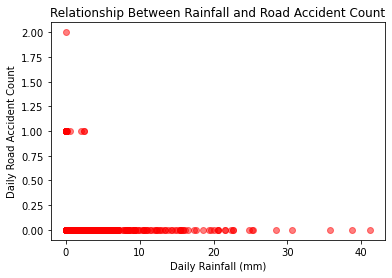

In [71]:
# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="red", edgecolors="red", alpha=0.5)
plt.title("Relationship Between Rainfall and Road Accident Count")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Road Accident Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Rainfall_vs_Accident_Count.png"))

In [57]:
# Calculating the correlation coefficient for daily rainfall and daily road accident count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily road accident count is {round(correlation[0],2)}")

# Outcome: correlation=0.04 means there is no correlation i.e daily rainfall has no impact 
# on daily road accident frequency. Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily road accident count is 0.04


#### (b) Road accident severity (as fatality count) against rainfall

In [67]:
# Group data by the accident date to find daily values.
grouped_df = melbourne_accident_rain_df.groupby(["ACCIDENT_DATE"])

# Assign data to axis: x_axis is fatality sum, y_axis is rainfall (mean used but all rainfall data 
# values same for the same date).
y_axis = grouped_df["FATALITY"].sum()
x_axis = grouped_df["Rainfall amount (millimetres)"].mean().reset_index()

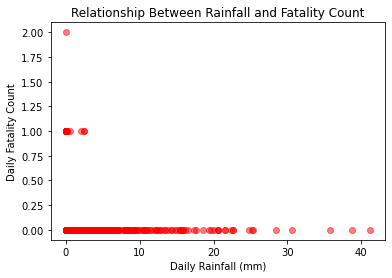

In [72]:
# Use matplotlib to create a scatter plot
plt.scatter(x_axis["Rainfall amount (millimetres)"], y_axis, marker="o", facecolors="red", edgecolors="red", alpha=0.5)
plt.title("Relationship Between Rainfall and Fatality Count")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Daily Fatality Count")

# Save the figure
plt.savefig(os.path.join("figures",f"Rainfall_vs_Fatality_Count.png"))

In [69]:
# Calculating the correlation coefficient for daily rainfall and daily fatality count
correlation = st.pearsonr(x_axis["Rainfall amount (millimetres)"], y_axis)
print(f"The correlation between daily rainfall and daily fatality count is {round(correlation[0],2)}")

# Outcome: correlation=-0.03 means there is no correlation i.e daily rainfall does not appear to 
# increase the likelihood of fatalities in road accidents in Melbourne. 
# Therefore confirming the Null Hypothesis.

The correlation between daily rainfall and daily fatality count is -0.03
